# Cleaning Data (Adult data)

### Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import math
import scipy
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing

sns.set(font_scale=1)

## Data Labels

#### __Features__:
1. __age__: continuous.
2. __workclass:__ Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. __fnlwgt__: sampling weight.
     
     > ___Found in documentation:___
     >
     >_Description of fnlwgt (final weight):_
     >
     >_The weights on the CPS files are controlled to independent estimates of the_
     >_civilian noninstitutional population of the US.  These are prepared monthly_
     >_for us by Population Division here at the Census Bureau.  We use 3 sets of_
     >_controls._
     >_These are:_
     >* _A single cell estimate of the population 16+ for each state._
     >* _Controls for Hispanic Origin by age and sex._
     >* _Controls by Race, age and sex._
     >
     >_We use all three sets of controls in our weighting program and "rake" through_
     >_them 6 times so that by the end we come back to all the controls we used._
     >_The term estimate refers to population totals derived from CPS by creating_
     >
     >_"weighted tallies" of any specified socio-economic characteristics of the_
     >_population._
     >
     >_People with similar demographic characteristics should have_
     >_similar weights.  There is one important caveat to remember_
     >_about this statement.  That is that since the CPS sample is_
     >_actually a collection of 51 state samples, each with its own_
     >_probability of selection, the statement only applies within_
     >_state.

4. __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. __education-num___: continuous.
6. __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-8. cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. __sex__: Female, Male.
11. __capital-gain__: income from investment sources, apart from wages/salary.
12. __capital-loss__: losses from investment sources, apart from wages/salary.
13. __hours-per-week__:continuous.
14. __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br></li>

#### __Label__ :

 15. __class:__ >50K, <=50K.

### Loading Data

In [2]:
#header = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship",\
#         "race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
#df_data = pd.read_csv("adult.data",names= header)
#df_data.tail()

In [3]:
#df_test = pd.read_csv("adult.test_t",names = header)
#df_test.head()

In [4]:
#df_fulldata = df_data.copy()
#df_fulldata = df_fulldata.append(df_test,ignore_index = True)
#df_fulldata.shape

In [5]:
#df_fulldata.iloc[32556:32566]

>Now that data is properly joined we don't have to load and append them every time, so we will store it and then just read it directly from there

In [6]:
#df_fulldata.to_csv("full_dataset.csv")

>After writing the data one time we don't need to repeat this process again when we are executing the notebook.

In [7]:
df_fulldata = pd.read_csv("full_dataset.csv",index_col = 0)

In [8]:
df_fulldata.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

>We can see that there are different types depending on the column.
>
>We will look if the data is formatted in a way that missing values can be recognized by pandas, otherwise we will >have to look for them manually and since we have more than one type of data we will have to do it by different means.

In [9]:
df_fulldata.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [10]:
df_fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


>We will look for the columns that cointain int64 and object types and look if it is indeed true that there exist no missing values. 

In [11]:
groups_types = df_fulldata.columns.to_series().groupby(df_fulldata.dtypes).unique()
groups_types.shape, groups_types[0], groups_types[1]

((2,), array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'], dtype=object), array(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'class'],
       dtype=object))

>we can se that among the columns that contain strings some have missing values represented as " ?" but we didn't find any different.
>
>We could create a list with all the expected classes and look if there exist one array that contains something not expected, and that would be probably the right way to proceed, but in this case, since there is only one string used a null value we will only look for those that include it in its set 

In [12]:
key_list = [pd.unique( df_fulldata[val]) for  val in groups_types[1]]
key_list

[array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
        ' Other

In [13]:
miss_string = ' ?'
key_ind = [ True if (miss_string in array) else False for array in key_list]
miss_val_ind = groups_types[1][key_ind].tolist(
miss_val_ind

['workclass', 'occupation', 'native-country']

In [14]:
df_fulldata[miss_val_ind] = df_fulldata.loc[:,miss_val_ind].replace(miss_string,np.nan)
df_fulldata.isnull().mean()

age               0.000000
workclass         0.057307
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017546
class             0.000000
dtype: float64

>Numerical columns are different than non-numerical ones. Since we can't look for unique elements(the array would be huge) we have to look at plots and try to localize if there is any outliers. Functions: mean, std, max, min should also help 

In [15]:
groups_types[0].tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [16]:
for i in range(0,len(groups_types[0].tolist())):  
    
    plt.show()

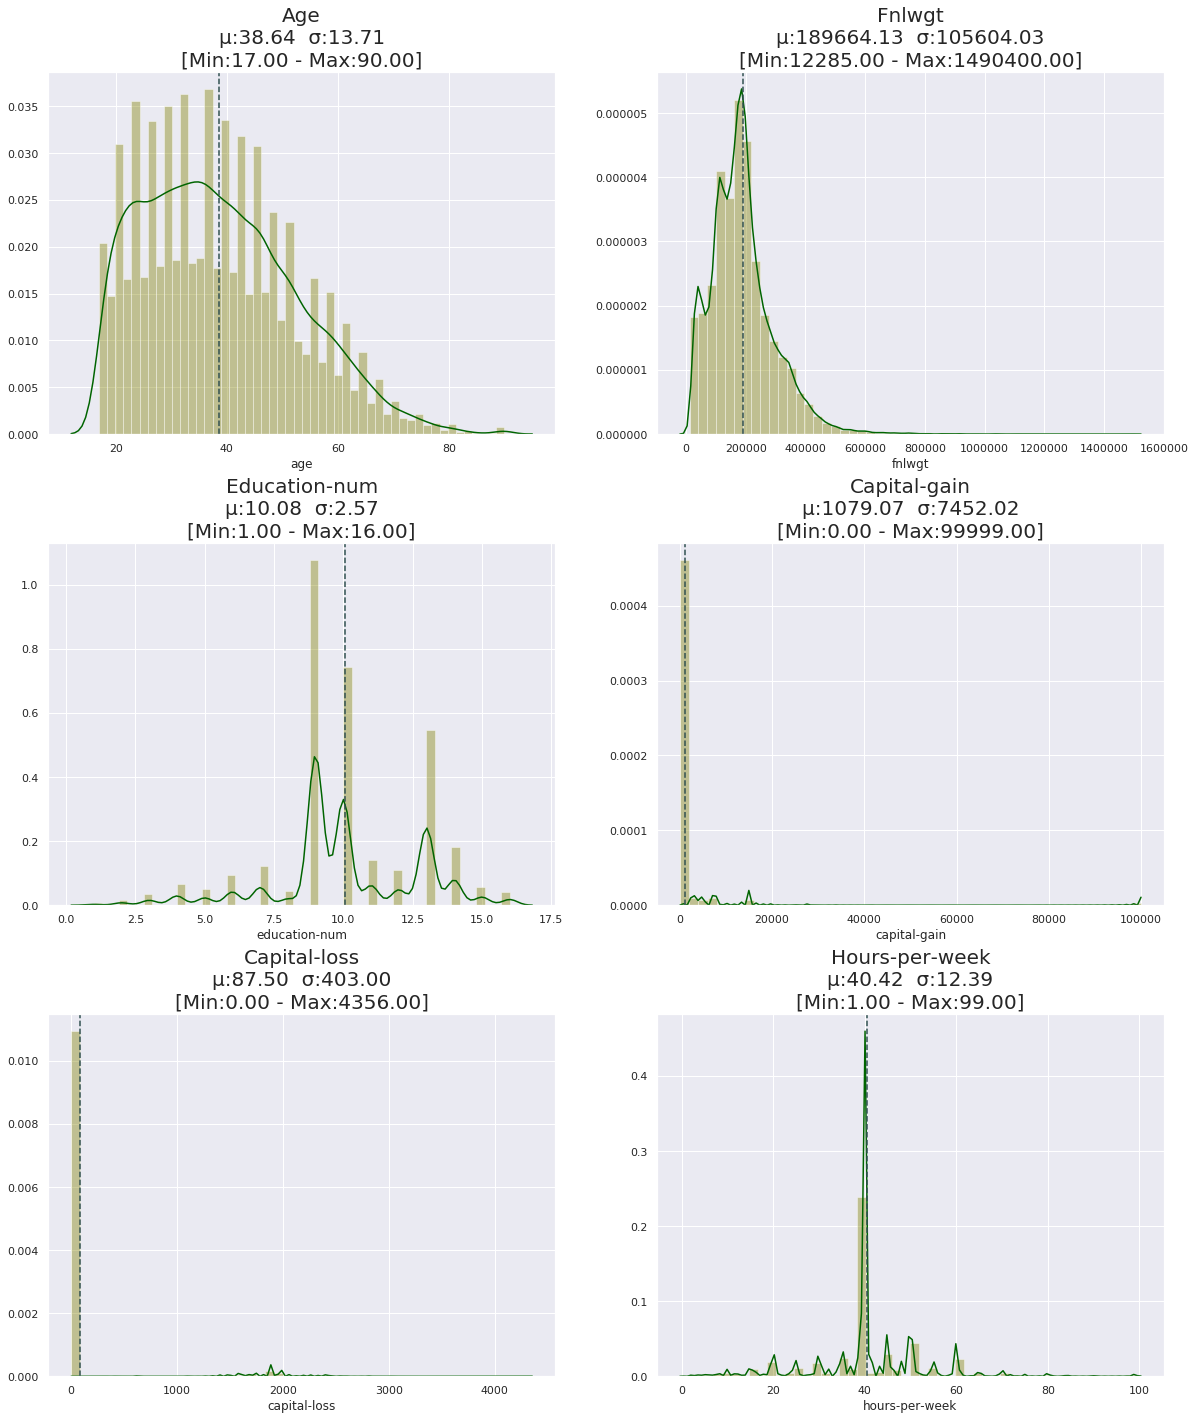

In [17]:
number_of_plots = len(groups_types[0].tolist())

n_cols = 2
n_rows = math.ceil(number_of_plots/n_cols)
fig, ax = plt.subplots(n_rows ,n_cols,figsize=(20,8*n_rows))

for i in range(0,len(groups_types[0].tolist())):    
    myax = ax[i//n_cols,i%n_cols]
    
    sns.distplot(df_fulldata[groups_types[0].tolist()[i]],\
                 ax = myax,color = "olive", rug = False,\
                 rug_kws={"alpha":0.3, "linewidth": 2, "height":0.025 },\
                 kde_kws={"color":"darkgreen","shade":False},\
                 hist_kws={})
                
    mean = df_fulldata[groups_types[0].tolist()[i]].mean()
    std = df_fulldata[groups_types[0].tolist()[i]].std()
    min_p = df_fulldata[groups_types[0].tolist()[i]].min()
    max_p = df_fulldata[groups_types[0].tolist()[i]].max()    
    text = "\n\u03BC:{:.2f}  \u03C3:{:.2f}\n[Min:{:.2f} - Max:{:.2f}]".format(mean,std,min_p,max_p)
    myax.set_title(groups_types[0].tolist()[i].capitalize()+text,loc = "center",fontsize = 20)
    myax.axvline(mean ,0,color = "darkslategrey",linestyle='dashed')
    plt.subplots_adjust(hspace= 0.3)
   

>Amount of rows deleted if we did not try to process them ( e.g. using the mode for classification or the mean for numerical values)

## TODO :
> - Replace NaN values with more accurate values( look for linear dependent columns and try to infer which would be a good aproximation) 
>

In [18]:
"Values that will be dropped({}) represent a {:.4f}% of the total dataset"\
.format(df_fulldata.shape[0]- df_fulldata.dropna().shape[0],
100*(df_fulldata.shape[0]- df_fulldata.dropna().shape[0])/df_fulldata.shape[0])

'Values that will be dropped(3620) represent a 7.4117% of the total dataset'

In [19]:
#df_drop = df_fulldata.dropna()
#df_drop.to_csv("dataset_dropnan.csv")
df_drop = pd.read_csv("dataset_dropnan.csv",index_col = 0)
df_drop.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
class             False
dtype: bool

### __Regarding using Labels or One-Hot-Encoding for categorical columns__
>
>Read in :https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor
>
>"There are some cases where __LabelEncoder__ or __DictVectorizor__ are useful, but these are quite limited in my opinion due to ordinality.
>
>__LabelEncoder__ can turn ___[dog,cat,dog,mouse,cat]___ into ___[1,2,1,3,2]___, but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like __decision trees and random forests__ that can work with categorical variables just fine and __LabelEncoder__ can be used to store values using less disk space.
>
>__One-Hot-Encoding__ has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ __one-hot-encoding__ followed by __PCA__ for dimensionality reduction. I find that the judicious combination of __one-hot__ plus __PCA__ can seldom be beat by other encoding schemes. __PCA__ finds the linear overlap, so will naturally tend to group similar features into the same feature."

Therefore, we would try to categorize every single categorical column and consequently apply the PCA method if we were to use a model different than the DecisionTree or the RandomForest.

Since we are starting with those two we will just use the LabelEncoder

In [20]:
groups_types_drop = df_drop.columns.to_series().groupby(df_drop.dtypes).unique()
groups_types_drop.shape, groups_types[0], groups_types[1]
key_list = [pd.unique( df_drop[val]) for  val in groups_types_drop[1]]
key_list, groups_types[1]

([array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
         ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
         ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
         ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
         ' 12th', ' 1st-4th'], dtype=object),
  array([' Never-married', ' Married-civ-spouse', ' Divorced',
         ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
         ' Widowed'], dtype=object),
  array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
         ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
         ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
         ' Craft-repair', ' Protective-serv', ' Armed-Forces',
         ' Priv-house-serv'], dtype=object),
  array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
         ' Other-relative'], dtype=ob

In [21]:
my_labels = {}
df_labels = df_drop.copy()
df_labels.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [22]:
for col in zip(key_list,groups_types[1]):
    encod= {}
    le = preprocessing.LabelEncoder()
    le.fit(col[0].tolist())
    encod["classes"] = le.classes_    
    encod["labels"] = le.transform(le.classes_)
    df_labels[col[1]] = le.transform(df_drop[col[1]])    
    my_labels[col[1]] = encod

In [23]:
df_labels.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          5   77516          9             13               4   
1   50          4   83311          9             13               2   
2   38          2  215646         11              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country  class  
0              40              38      0  
1              13              38      0  
2              40              38      0  
3              40              38      0  
4              40               4      0

In [24]:
pd.DataFrame(my_labels)

workclass  \
classes  [ Federal-gov,  Local-gov,  Private,  Self-emp...   
labels                               [0, 1, 2, 3, 4, 5, 6]   

                                                 education  \
classes  [ 10th,  11th,  12th,  1st-4th,  5th-6th,  7th...   
labels   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            marital-status  \
classes  [ Divorced,  Married-AF-spouse,  Married-civ-s...   
labels                               [0, 1, 2, 3, 4, 5, 6]   

                                                occupation  \
classes  [ Adm-clerical,  Armed-Forces,  Craft-repair, ...   
labels      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]   

                                              relationship  \
classes  [ Husband,  Not-in-family,  Other-relative,  O...   
labels                                  [0, 1, 2, 3, 4, 5]   

                                                      race               sex  \
classes  [ Amer-Indian-Eskimo,  Asian-Pac-Islander,  Bl...  [ Female,  Male]   
labels                                     [0, 1, 2, 3, 4]            [0, 1]   

                                            native-country            class  
classes  [ Cambodia,  Canada,  China,  Columbia,  Cuba,...  [ <=50K,  >50K]  
labels   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           [0, 1]

In [25]:
#df_labels.to_csv("dataset_w_labels.csv")
#pd.DataFrame(my_labels).to_csv("my_labels_codes.csv")
df = pd.read_csv("dataset_w_labels.csv",index_col = 0)

Text(0.5, 1, 'Correlation Matrix("Pearson")')

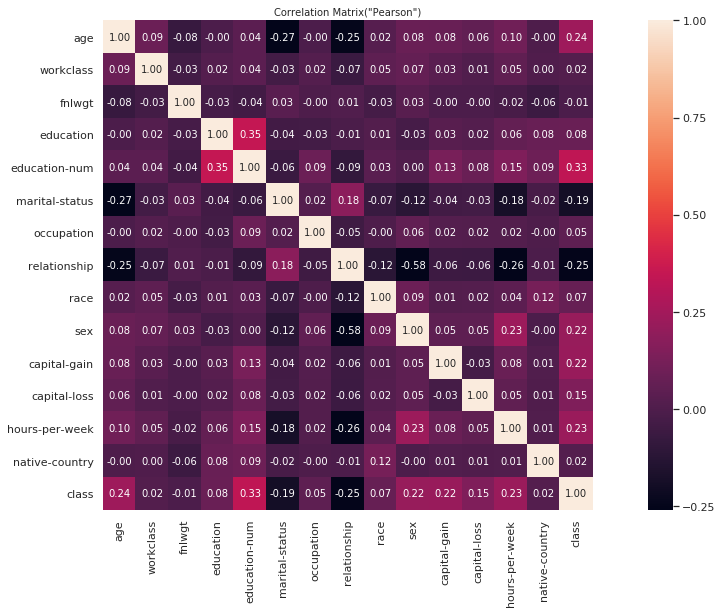

In [26]:
df_corr = df.corr()

fig, ax1 = plt.subplots(1,1,figsize = (20,9))
sns.heatmap(df_corr,ax=ax1,square=True,robust=True,annot = True,fmt =".2f")
ax1.set_title("Correlation Matrix(\"Pearson\")",fontsize = 10)

>We see some weird correlations that involve labeled features(e.g. sex / relationship, education-num / education). This is probably due to not being in binary mode (one-hot-encode) and taking into account the numeric value of the label as if it was indicator of something different rather than arbritary (since the order doesn't correspond to an estimation of the value of the education received). We will remove them for now and only let those that are already binary (sex, class) and see if anything changes.

In [27]:
relevant_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week',"sex","class"]

pd.reset_option("all",True)
df.loc[:,relevant_col].head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   sex  class  
0    1      0  
1    1      0  
2    1      0  
3    1      0  
4    0      0

Text(0.5, 1, 'Correlation Matrix("Pearson")')

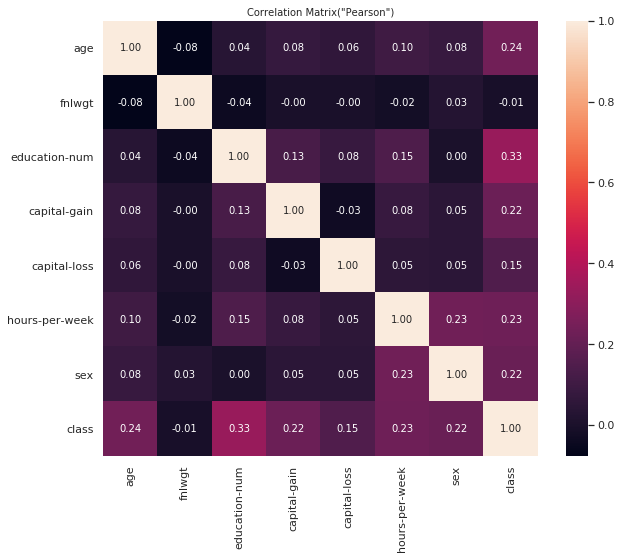

In [28]:
df_corr_mod_P = df.loc[:,relevant_col].corr()

fig, ax1 = plt.subplots(1,1,figsize = (10,8))
sns.heatmap(df_corr_mod_P,ax=ax1,square=True,robust=False,annot = True,fmt =".2f")
ax1.set_title("Correlation Matrix(\"Pearson\")",fontsize = 10)

>Even if it is more subtle we can still see the same correlations we were seeing before on the features.
>We will try other methods to compute the correlation (Kendall and Spearman)

In [29]:
df_corr_mod_K = df.loc[:,relevant_col].corr(method="kendall")
df_corr_mod_S = df.loc[:,relevant_col].corr(method="spearman")

Text(0.5, 1, 'Covariance Matrix')

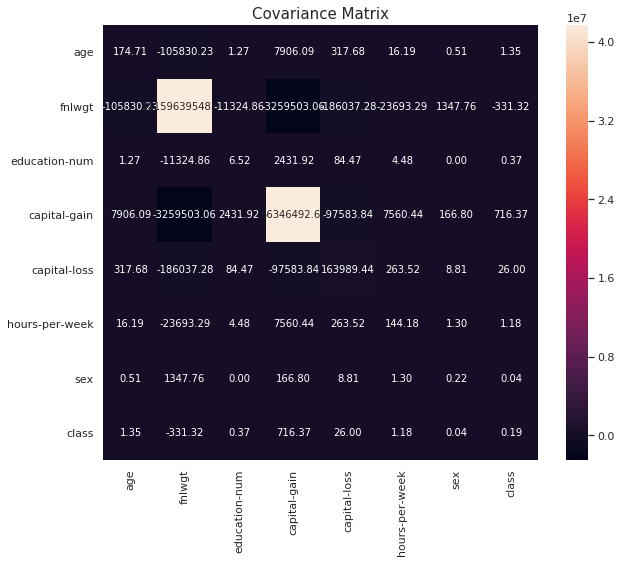

In [32]:
df_cov = df.loc[:,relevant_col].cov()

fig, (ax1) = plt.subplots(1,1,figsize = (10,8))
sns.heatmap(df_cov,ax=ax1,square=True,robust=True,annot = True,fmt =".2f")
ax1.set_title("Covariance Matrix",fontsize = 15)

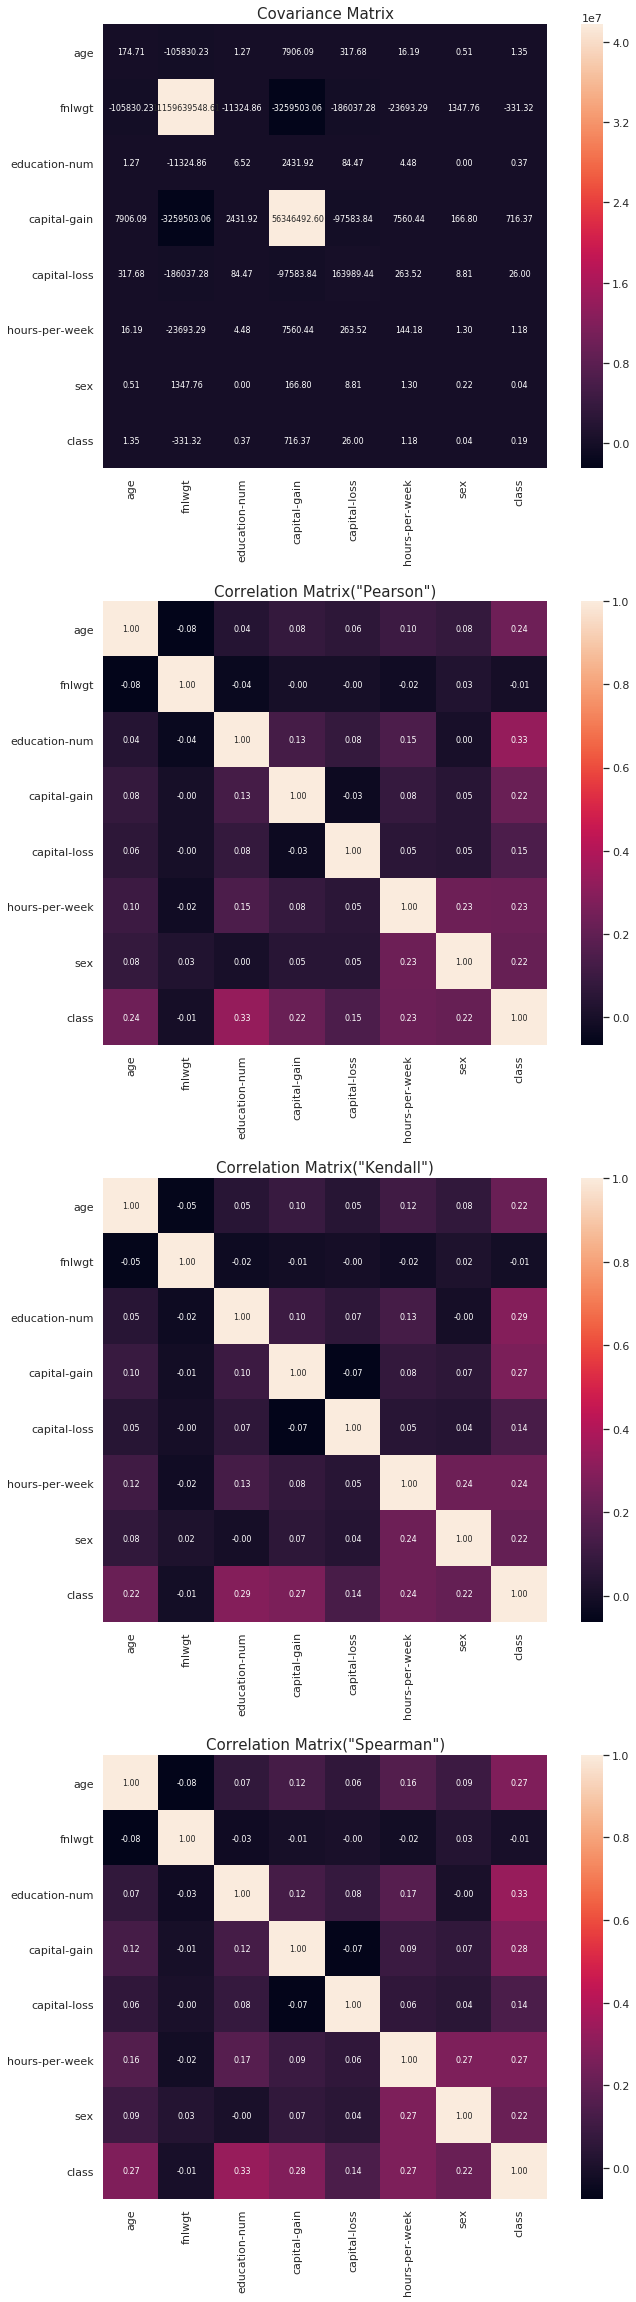

In [55]:
sns.set(font_scale=1)

fig, (axr) = plt.subplots(4,1,figsize = (12,40))
titles = ["Covariance Matrix","Correlation Matrix(\"Pearson\")",\
          "Correlation Matrix(\"Kendall\")","Correlation Matrix(\"Spearman\")"]
mat = [df_cov,df_corr_mod_P,df_corr_mod_K,df_corr_mod_S]
tsize = 8

for i,ax in enumerate(axr.flat):
    
    sns.heatmap(mat[i],ax=ax,square=True,robust=True,annot = True,fmt =".2f",annot_kws={"size": tsize})
    ax.set_title(titles[i],fontsize = 15)    
    plt.subplots_adjust(hspace= 0.3)

sns.set(font_scale=1)     

# Bonus

>Just as an experiment, we will try to see what happens if we scale our data before computing the matrices

In [46]:
scaler = preprocessing.StandardScaler()
print(scaler.fit(df.loc[:,relevant_col]))
df_relcol_sca = pd.DataFrame(scaler.transform(df.loc[:,relevant_col]),columns = relevant_col)
df_relcol_sca.head()

StandardScaler(copy=True, with_mean=True, with_std=True)


age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.034201 -1.062295       1.128753      0.142888      -0.21878   
1  0.866417 -1.007438       1.128753     -0.146733      -0.21878   
2 -0.041455  0.245284      -0.438122     -0.146733      -0.21878   
3  1.093385  0.425853      -1.221559     -0.146733      -0.21878   
4 -0.798015  1.407393       1.128753     -0.146733      -0.21878   

   hours-per-week       sex     class  
0       -0.078120  0.693813 -0.574031  
1       -2.326738  0.693813 -0.574031  
2       -0.078120  0.693813 -0.574031  
3       -0.078120  0.693813 -0.574031  
4       -0.078120 -1.441310 -0.574031

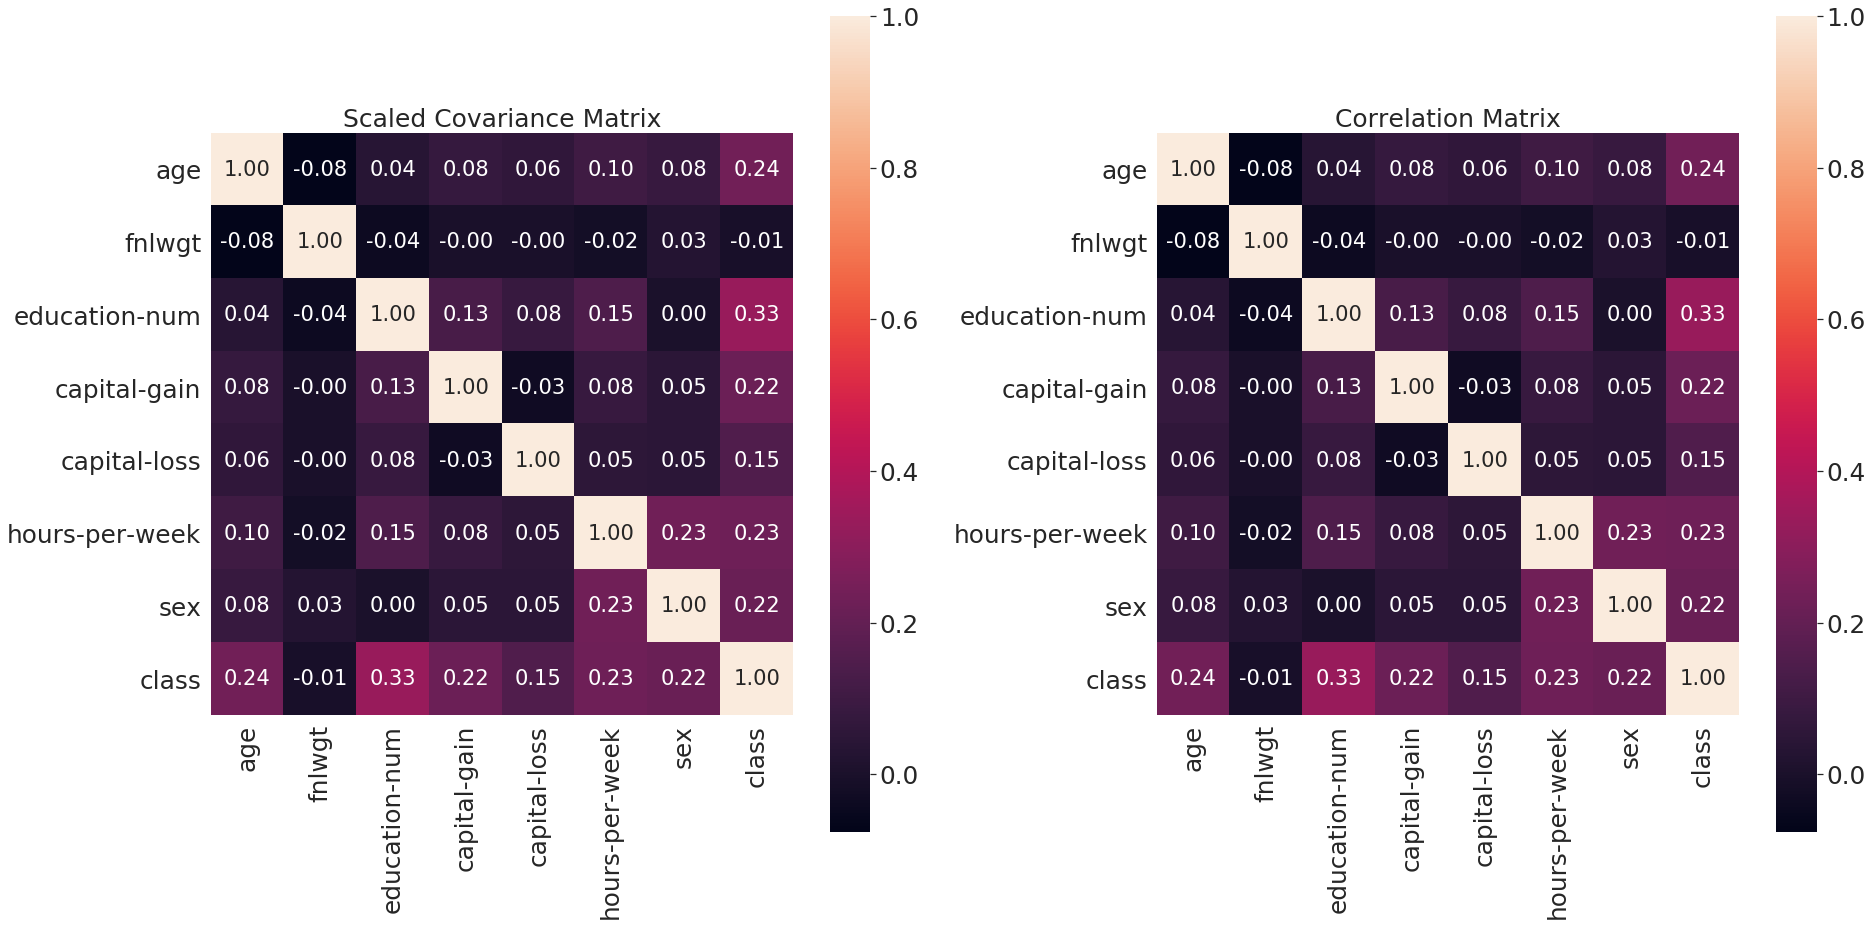

In [49]:
sns.set(font_scale=2.25)

df_cov_sca = df_relcol_sca.cov()
fig, (axr) = plt.subplots(1,2,figsize = (30,15))
titles = ["Scaled Covariance Matrix","Correlation Matrix"]
mat = [df_cov_sca,df_corr_mod_P]
tsize = 21

for i,ax in enumerate(axr.flat):
    
    sns.heatmap(mat[i],ax=ax,square=True,robust=False,annot = True,fmt =".2f",annot_kws={"size": tsize})
    ax.set_title(titles[i],fontsize = 25)    
    plt.subplots_adjust(wspace= 0.3)

sns.set(font_scale=1) 

> We can observe that if we scale the data before computing the covariance matrix the result is exactly to that of what we would obtain from computing directly the correlation matrix.

## Preparing data to export
>Now that we know most of our data let's prepare it for working with it in the upcoming models by applying an standard scale.

In [56]:
numeric_col = groups_types[0].tolist()

In [98]:
df_scaled = df_drop.copy()

scaler = preprocessing.StandardScaler()
df_scaled.loc[:,numeric_col] = scaler.fit_transform(df.loc[:,numeric_col])
df_scaled.head()

age          workclass    fnlwgt   education  education-num  \
0  0.034201          State-gov -1.062295   Bachelors       1.128753   
1  0.866417   Self-emp-not-inc -1.007438   Bachelors       1.128753   
2 -0.041455            Private  0.245284     HS-grad      -0.438122   
3  1.093385            Private  0.425853        11th      -1.221559   
4 -0.798015            Private  1.407393   Bachelors       1.128753   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0      0.142888      -0.21878       -0.078120   United-States   <=50K  
1     -0.146733      -0.21878       -2.326738   United-States   <=50K  
2     -0.146733      -0.21878       -0.078120   United-States   <=50K  
3     -0.146733      -0.21878       -0.078120   United-States   <=50K  
4     -0.146733      -0.21878       -0.078120            Cuba   <=50K

In [ ]:
#df_scaled.to_csv("dataset_labels_scaled.csv")

### One-Hot-Encoder

In [99]:
groups_types[1]

array(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype=object)

In [119]:
#O-H-E
df_ohe = pd.get_dummies(df_scaled,columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race','native-country'])
cols = df_ohe.columns.tolist()

#placing the class column at the end
class_col = df_ohe["class"]
df_ohe = df_ohe.drop("class",axis = 1)
df_ohe = pd.concat([df_ohe,class_col],axis = 1)

#maping binary classes
df_ohe["sex"]= df_ohe["sex"].map({' Male': 1, ' Female': 0})
df_ohe["class"]= df_ohe["class"].map({' <=50K': 0, ' >50K': 1})

In [120]:
df_ohe.sample(10)

age    fnlwgt  education-num  sex  capital-gain  capital-loss  \
44104  1.396009  0.633250       1.128753    1     -0.146733     -0.218780   
3133   0.488137 -1.155064      -0.438122    1      1.254747     -0.218780   
35907  0.336825 -0.777663      -0.046403    1     -0.146733     -0.218780   
45062 -0.495391  1.686602      -1.613277    0     -0.146733     -0.218780   
27185 -0.798015  0.990773      -0.046403    1     -0.146733     -0.218780   
28330 -0.117111 -0.888693      -0.438122    0     -0.146733     -0.218780   
43199  0.185513 -1.536291      -0.046403    1     -0.146733     -0.218780   
3639   0.034201  0.272206       1.128753    1     -0.146733      4.344728   
20082  1.547321  0.054263       1.520471    1     -0.146733     -0.218780   
1901   2.001257 -1.540380      -2.396715    0     -0.146733     -0.218780   

       hours-per-week  workclass_ Federal-gov  workclass_ Local-gov  \
44104        1.587523                       0                     0   
3133         0.588137                       0                     0   
35907        1.171112                       0                     0   
45062       -0.078120                       0                     0   
27185       -0.078120                       0                     0   
28330       -0.078120                       0                     0   
43199       -0.078120                       1                     0   
3639        -0.078120                       0                     0   
20082       -0.078120                       1                     0   
1901         0.754701                       0                     0   

       workclass_ Private  ...  native-country_ Puerto-Rico  \
44104                   0  ...                            0   
3133                    1  ...                            0   
35907                   1  ...                            0   
45062                   1  ...                            0   
27185                   0  ...                            0   
28330                   1  ...                            0   
43199                   0  ...                            0   
3639                    1  ...                            0   
20082                   0  ...                            0   
1901                    0  ...                            0   

       native-country_ Scotland  native-country_ South  \
44104                         0                      0   
3133                          0                      0   
35907                         0                      0   
45062                         0                      0   
27185                         0                      0   
28330                         0                      0   
43199                         0                      0   
3639                          0                      0   
20082                         0                      0   
1901                          0                      0   

       native-country_ Taiwan  native-country_ Thailand  \
44104                       0                         0   
3133                        0                         0   
35907                       0                         0   
45062                       0                         0   
27185                       0                         0   
28330                       0                         0   
43199                       0                         0   
3639                        0                         0   
20082                       0                         0   
1901                        0                         0   

       native-country_ Trinadad&Tobago  native-country_ United-States  \
44104                                0                              0   
3133                                 0                              1   
35907                                0                              1   
45062                                0                              0   
27185                             

In [121]:
df_ohe.shape

(45222, 104)

In [124]:
df_ohe_corr = df_ohe.corr()

sns.set(font_scale=.6)

fig, ax1 = plt.subplots(1,1,figsize = (20,20))#,dpi = 500)
sns.heatmap(df_ohe_corr,ax=ax1,square=True,robust=True,annot = False,fmt =".2f")
ax1.set_title("Correlation Matrix(\"Pearson\")",fontsize = 10)
#plt.savefig("output.png")
sns.set(font_scale=1)


### feature selection :
https://machinelearningmastery.com/an-introduction-to-feature-selection/

### SelectKBest


### MISC

In [ ]:
pd.DataFrame(df.loc[:,relevant_col][df.loc[:,"hours-per-week"]>40]\
             .groupby(by=["class","sex"]).size(),columns=["Number of adults"])

>__TODO:__ 
group by bins of fnlwgt

In [ ]:
df_fulldata[(df.loc[:,"fnlwgt"]>200000) & (df_fulldata.loc[:,"fnlwgt"]<300000)].mode()